In [1]:
#Reinforcement learning
import numpy as np
from math import inf as infinity
import itertools
import random

game_state = [[' ',' ',' '],
              [' ',' ',' '],
              [' ',' ',' ']]
players = ['X','O']

def play_move(state, player, block_num):
    if state[int((block_num-1)/3)][(block_num-1)%3] == ' ':
        state[int((block_num-1)/3)][(block_num-1)%3] = player
    else:
        block_num = int(input("Block != empty, Choose again: "))
        play_move(state, player, block_num)
    
def copy_game_state(state):
    new_state = [[' ',' ',' '],[' ',' ',' '],[' ',' ',' ']]
    for i in range(3):
        for j in range(3):
            new_state[i][j] = state[i][j]
    return new_state
    
def check_current_state(game_state):    
    # Check horizontals
    if (game_state[0][0] == game_state[0][1] and game_state[0][1] == game_state[0][2] and game_state[0][0] != ' '):
        return game_state[0][0], "Done"
    if (game_state[1][0] == game_state[1][1] and game_state[1][1] == game_state[1][2] and game_state[1][0] != ' '):
        return game_state[1][0], "Done"
    if (game_state[2][0] == game_state[2][1] and game_state[2][1] == game_state[2][2] and game_state[2][0] != ' '):
        return game_state[2][0], "Done"
    
    # Check verticals
    if (game_state[0][0] == game_state[1][0] and game_state[1][0] == game_state[2][0] and game_state[0][0] != ' '):
        return game_state[0][0], "Done"
    if (game_state[0][1] == game_state[1][1] and game_state[1][1] == game_state[2][1] and game_state[0][1] != ' '):
        return game_state[0][1], "Done"
    if (game_state[0][2] == game_state[1][2] and game_state[1][2] == game_state[2][2] and game_state[0][2] != ' '):
        return game_state[0][2], "Done"
    
    # Check diagonals
    if (game_state[0][0] == game_state[1][1] and game_state[1][1] == game_state[2][2] and game_state[0][0] != ' '):
        return game_state[1][1], "Done"
    if (game_state[2][0] == game_state[1][1] and game_state[1][1] == game_state[0][2] and game_state[2][0] != ' '):
        return game_state[1][1], "Done"
    
    # Check if draw
    draw_flag = 0
    for i in range(3):
        for j in range(3):
            if game_state[i][j] == ' ':
                draw_flag = 1
    if draw_flag == 0:
        return None, "Draw"
    
    return None, "Not Done"

def print_board(game_state):
    print('----------------')
    print('| ' + str(game_state[0][0]) + ' || ' + str(game_state[0][1]) + ' || ' + str(game_state[0][2]) + ' |')
    print('----------------')
    print('| ' + str(game_state[1][0]) + ' || ' + str(game_state[1][1]) + ' || ' + str(game_state[1][2]) + ' |')
    print('----------------')
    print('| ' + str(game_state[2][0]) + ' || ' + str(game_state[2][1]) + ' || ' + str(game_state[2][2]) + ' |')
    print('----------------')
    
  
# Initialize state values
player = ['X','O',' ']
states_dict = {}
all_possible_states = [[list(i[0:3]),list(i[3:6]),list(i[6:10])] for i in itertools.product(player, repeat = 9)]
n_states = len(all_possible_states) # 2 players, 9 spaces
n_actions = 9   # 9 spaces
state_values_for_AI = np.full((n_states),0.0)
print("n_states = %i \nn_actions = %i"%(n_states, n_actions))

for i in range(n_states):
    states_dict[i] = all_possible_states[i]
    winner, _ = check_current_state(states_dict[i])
    if winner == 'O':   # AI won
        state_values_for_AI[i] = 1
    elif winner == 'X':   # AI lost
        state_values_for_AI[i] = -1

def update_state_value(curr_state_idx, next_state_idx, learning_rate):
    new_value = state_values_for_AI[curr_state_idx] + learning_rate*(state_values_for_AI[next_state_idx]  - state_values_for_AI[curr_state_idx])
    state_values_for_AI[curr_state_idx] = new_value
    

n_states = 19683 
n_actions = 9


In [3]:
def getBestMove(state, player):
    '''
    Reinforcement Learning Algorithm
    '''    
    moves = []
    curr_state_values = []
    empty_cells = []
    for i in range(3):
        for j in range(3):
            if state[i][j] == ' ':
                empty_cells.append(i*3 + (j+1))
    
    for empty_cell in empty_cells:
        moves.append(empty_cell)
        new_state = copy_game_state(state)
        play_move(new_state, player, empty_cell)
        next_state_idx = list(states_dict.keys())[list(states_dict.values()).index(new_state)]
        curr_state_values.append(state_values_for_AI[next_state_idx])
        
    print('Possible moves = ' + str(moves))
    print('Move values = ' + str(curr_state_values))    
    best_move_idx = np.argmax(curr_state_values)
    best_move = moves[best_move_idx]
    return best_move  

In [5]:
# PLaying
    
state_values_for_AI = np.loadtxt("trained_state_values_O.txt", dtype=np.float64)

play_again = 'Y'
while play_again == 'Y' or play_again == 'y':
    game_state = [[' ',' ',' '],
              [' ',' ',' '],
              [' ',' ',' ']]
    current_state = "Not Done"
    print("\nNew Game!")
    print_board(game_state)
    player_choice = input("Choose which player goes first - X (You) or O(AI): ")
    winner = None
    
    if player_choice == 'X' or player_choice == 'x':
        current_player_idx = 0
    else:
        current_player_idx = 1
        
    while current_state == "Not Done":
        curr_state_idx = list(states_dict.keys())[list(states_dict.values()).index(game_state)]
        if current_player_idx == 0: # Human's turn
            block_choice = int(input("Your turn! Choose where to place (1 to 9): "))
            play_move(game_state ,players[current_player_idx], block_choice)
            
        else:   # AI's turn
            block_choice = getBestMove(game_state, players[current_player_idx])
            play_move(game_state ,players[current_player_idx], block_choice)
            print("AI plays move: " + str(block_choice))
        
        print_board(game_state)
        winner, current_state = check_current_state(game_state)
        if winner != None:
            print(str(winner) + " won!")
        else:
            current_player_idx = (current_player_idx + 1)%2
        
        if current_state == "Draw":
            print("Draw!")
            
    play_again = input('Wanna try again?(Y/N) : ')
print('gd game!')  


New Game!
----------------
|   ||   ||   |
----------------
|   ||   ||   |
----------------
|   ||   ||   |
----------------


Choose which player goes first - X (You) or O(AI):  x
Your turn! Choose where to place (1 to 9):  1


----------------
| X ||   ||   |
----------------
|   ||   ||   |
----------------
|   ||   ||   |
----------------
Possible moves = [2, 3, 4, 5, 6, 7, 8, 9]
Move values = [-0.175858, 0.01031, -0.051866, 0.250661, -0.008078, 0.013969, -0.002939, -0.00299]
AI plays move: 5
----------------
| X ||   ||   |
----------------
|   || O ||   |
----------------
|   ||   ||   |
----------------


Your turn! Choose where to place (1 to 9):  3


----------------
| X ||   || X |
----------------
|   || O ||   |
----------------
|   ||   ||   |
----------------
Possible moves = [2, 4, 6, 7, 8, 9]
Move values = [0.16, 0.8524, 0.696045, 0.052938, 0.12, -0.137713]
AI plays move: 4
----------------
| X ||   || X |
----------------
| O || O ||   |
----------------
|   ||   ||   |
----------------


Your turn! Choose where to place (1 to 9):  2


----------------
| X || X || X |
----------------
| O || O ||   |
----------------
|   ||   ||   |
----------------
X won!


Wanna try again?(Y/N) :  n


gd game!


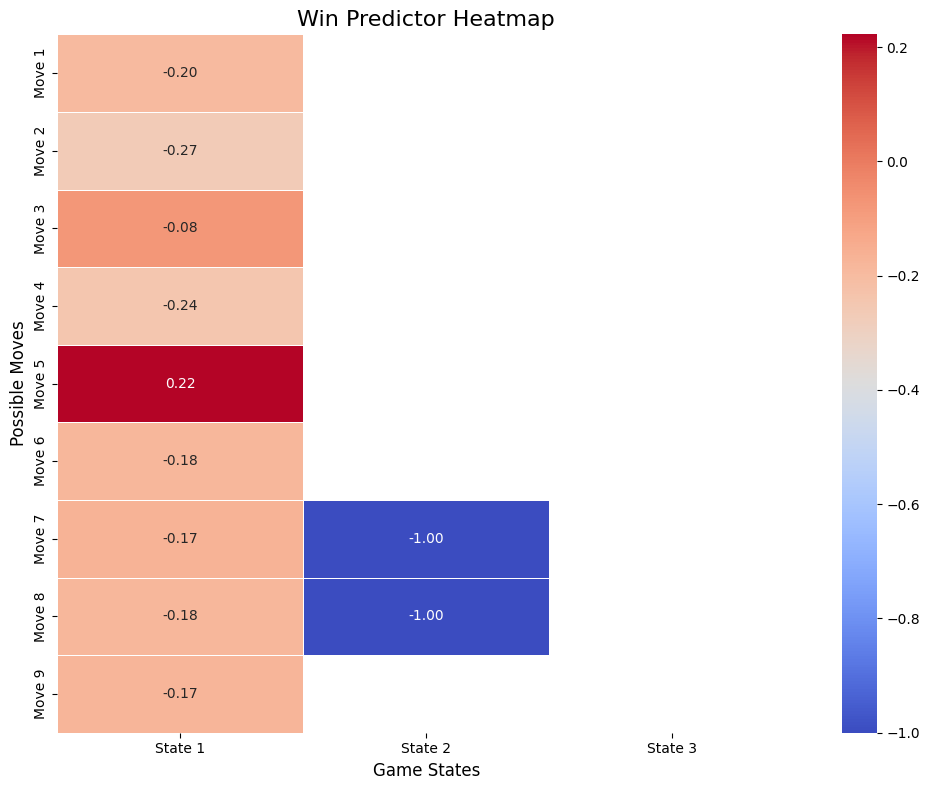

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

state_values_for_AI = np.loadtxt('trained_state_values_O.txt', dtype=np.float64)

# using this to copy the game data
def copy_game_state(state):
    new_state = [[' ', ' ', ' '], [' ', ' ', ' '], [' ', ' ', ' ']]
    for i in range(3):
        for j in range(3):
            new_state[i][j] = state[i][j]
    return new_state

def play_move(state, player, block_num):
    if state[int((block_num - 1) / 3)][(block_num - 1) % 3] == ' ':
        state[int((block_num - 1) / 3)][(block_num - 1) % 3] = player

# Select representative game states (manually or randomly)
representative_states = [
    [[' ', ' ', ' '], [' ', ' ', ' '], [' ', ' ', ' ']],  
    [['X', 'O', 'X'], ['O', 'X', 'O'], [' ', ' ', 'X']],  
    [['X', 'O', 'X'], ['O', 'X', 'O'], ['O', 'X', 'O']]   
]

# Calculate win probabilities for selected states
win_probabilities = np.zeros((9, len(representative_states)))  # 9 moves x selected states

for state_idx, state in enumerate(representative_states):
    for move in range(1, 10):
        row, col = (move - 1) // 3, (move - 1) % 3
        if state[row][col] == ' ':  # Check if the cell is empty
            new_state = copy_game_state(state)
            play_move(new_state, 'O', move)  # Simulate AI's move ('O')
            
           
            try:
                next_state_idx = list(states_dict.keys())[list(states_dict.values()).index(new_state)]
                win_probabilities[move - 1, state_idx] = state_values_for_AI[next_state_idx]
            except ValueError:
                win_probabilities[move - 1, state_idx] = 0  # Assign zero if state not found
        else:
            win_probabilities[move - 1, state_idx] = np.nan  # Mark invalid moves as NaN

# Creating   a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(win_probabilities, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=[f"State {i+1}" for i in range(len(representative_states))],
            yticklabels=[f"Move {i+1}" for i in range(9)],
            linewidths=0.5, linecolor='white', cbar=True)

# Add labels and title
plt.title("Win Predictor Heatmap", fontsize=16)
plt.xlabel("Game States", fontsize=12)
plt.ylabel("Possible Moves", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
